In [1]:
# importing required libraries and modules

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error
import datetime
import time
#import resource
from sklearn import preprocessing
sns.set()

In [2]:
#  loading dataset

#train = pd.read_csv('Train.csv')
#test = pd.read_csv('Test.csv')
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
#data1 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [205]:
data.shape

(48204, 9)

In [206]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
# deleting duplicate entries
duplicateRowsDF = data[data.duplicated(['date_time'])]
data.drop_duplicates(subset='date_time', keep='first', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40575 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              40575 non-null  object 
 1   temp                 40575 non-null  float64
 2   rain_1h              40575 non-null  float64
 3   snow_1h              40575 non-null  float64
 4   clouds_all           40575 non-null  int64  
 5   weather_main         40575 non-null  object 
 6   weather_description  40575 non-null  object 
 7   date_time            40575 non-null  object 
 8   traffic_volume       40575 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.1+ MB


In [4]:
data.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [5]:
# handling outliers

for index, row in data.iterrows():
    if row['temp'] == 0:
       data.drop(index, inplace=True)
    if  row['rain_1h'] > 60:
        data.drop(index, inplace=True)
    if  row['snow_1h'] > 0.2:  
        data.drop(index, inplace=True) 

In [29]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
sns.distplot(train['traffic_volume'])

In [6]:
# extracting date and time

data['date_time'] = pd.to_datetime(data.date_time)
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['dayofyear'] = data['date_time'].dt.dayofyear
data['weekofyear'] = data['date_time'].dt.weekofyear
data['dayofweek'] = data['date_time'].dt.dayofweek
data['hour'] = data['date_time'].dt.hour

In [9]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,None,288.28,0.0,0.0,40,Clouds,24,2012-10-02 09:00:00,5545,2012,10,2,276,40,1,9
1,None,289.36,0.0,0.0,75,Clouds,2,2012-10-02 10:00:00,4516,2012,10,2,276,40,1,10
2,None,289.58,0.0,0.0,90,Clouds,19,2012-10-02 11:00:00,4767,2012,10,2,276,40,1,11
3,None,290.13,0.0,0.0,90,Clouds,19,2012-10-02 12:00:00,5026,2012,10,2,276,40,1,12
4,None,291.14,0.0,0.0,75,Clouds,2,2012-10-02 13:00:00,4918,2012,10,2,276,40,1,13


In [7]:
# label encoding categorical features
labelencoder = LabelEncoder()
data['weather_description'] = labelencoder.fit_transform(data['weather_description'])

In [ ]:
data.head()

In [11]:
data.shape

(40555, 16)

In [8]:
# mapping holidays to proper dates
data['dates'] = [d.date() for d in data['date_time']]

datelist = data['date_time']
df_date = data.copy()
#df_date['time'] = df_date['date_time'].dt.time

date_of_holiday = data.dates[data.holiday != 'None']
holiday_type = data.holiday[data.holiday != 'None']
mapping = {i:j for i, j in zip(date_of_holiday, holiday_type)}
for x in mapping:
    data.loc[data.dates == x, 'holiday'] = mapping[x]

data.drop(['dates'], axis=1, inplace=True)
data.drop(['date_time'], axis=1, inplace=True)

In [9]:
df_date.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour,dates
0,None,288.28,0.0,0.0,40,Clouds,24,2012-10-02 09:00:00,5545,2012,10,2,276,40,1,9,2012-10-02
1,None,289.36,0.0,0.0,75,Clouds,2,2012-10-02 10:00:00,4516,2012,10,2,276,40,1,10,2012-10-02
2,None,289.58,0.0,0.0,90,Clouds,19,2012-10-02 11:00:00,4767,2012,10,2,276,40,1,11,2012-10-02
3,None,290.13,0.0,0.0,90,Clouds,19,2012-10-02 12:00:00,5026,2012,10,2,276,40,1,12,2012-10-02
4,None,291.14,0.0,0.0,75,Clouds,2,2012-10-02 13:00:00,4918,2012,10,2,276,40,1,13,2012-10-02


In [ ]:
from pylab import rcParams
rcParams ['figure.figsize'] = 14, 5
plt.plot(datelist, data['traffic_volume'])
plt.show()

In [ ]:
data.head()

In [10]:
# creation of is_weekend and peak_hr columns and assigning weights by referring graphs
for index, row in data.iterrows():

    if data.loc[index,'dayofweek']==6:
        data.at[index,'is_weekend']=2
    elif data.loc[index,'dayofweek']==5:
        data.at[index,'is_weekend']=3
    elif data.loc[index,'dayofweek']==4:
        data.at[index,'is_weekend']=6
    else:
        data.at[index,'is_weekend']=5

    if data.loc[index,'hour']>=22 and data.loc[index,'hour']<6:
        data.at[index,'peak_hr']=int(0)
    elif data.loc[index,'hour']>=19 and data.loc[index,'hour']<22:
        data.at[index,'peak_hr']=int(2)
    elif data.loc[index,'hour']>14 and data.loc[index,'hour']<19:
        data.at[index,'peak_hr']=int(9)
    elif data.loc[index,'hour']>=6 and data.loc[index,'hour']<=9:
        data.at[index,'peak_hr']=int(1)
    else:
         data.at[index,'peak_hr']=int(1.5)
            
            
# assigned weights (custom encoding)
# is_holiday encoding
 
    if data.loc[index,'holiday']=='None':
        data.loc[index,'holiday']=900
    elif data.loc[index,'holiday']=='Columbus Day' or data.loc[index,'holiday']=='Veterans Day' or data.loc[index,'holiday']=='Washingtons Birthday' or data.loc[index,'holiday']=='State Fair':
        data.loc[index,'holiday']=20
    elif data.loc[index,'holiday']=='Thanksgiving Day' or data.loc[index,'holiday']=='Christmas Day' or data.loc[index,'holiday']=='New Years Day' or data.loc[index,'holiday']=='Independence Day' or data.loc[index,'holiday']=='Labor Day':
        data.loc[index,'holiday']=15
    elif data.loc[index,'holiday']=='Memorial Day' or data.loc[index,'holiday']=='Martin Luther King Day':
        data.loc[index,'holiday']=10
    else :
        data.loc[index,'holiday']=15
        
 # weather_type encoding       
    if data.loc[index,'weather_main']=='Clouds':
        data.loc[index,'weather_main']=40
    elif data.loc[index,'weather_main']=='Clear':
        data.loc[index,'weather_main']=30
    elif data.loc[index,'weather_main']=='Rain' or data.loc[index,'weather_main']=='Mist':
        data.loc[index,'weather_main']=12
    elif data.loc[index,'weather_main']=='Snow':
        data.loc[index,'weather_main']=7
    elif data.loc[index,'weather_main']=='Drizzle' or data.loc[index,'weather_main']=='Haze':
        data.loc[index,'weather_main']=5
    elif data.loc[index,'weather_main']=='Fog' or data.loc[index,'weather_main']=='Thunderstorm':
        data.loc[index,'weather_main']=3
    elif data.loc[index,'weather_main']=='Squall' or data.loc[index,'weather_main']=='Smoke':
        data.loc[index,'weather_main']=1
    else :
        data.loc[index,'weather_main']=10


In [ ]:
data.to_csv('new_preprocessed.csv')

In [47]:
data.shape

(40555, 17)

In [37]:
df = pd.read_csv('new_preprocessed.csv')
df = df.drop(['Unnamed: 0'], axis=1)
y = df['traffic_volume']
X = df.drop(['traffic_volume'], axis=1)
df = X.join(y, how='inner')

In [38]:
# convert series to supervised learning
def series_to_supervised(df, n_input=1, n_output=1, dropnan=True):
	n_vars = 1 if type(df) is list else df.shape[1]
	df = pd.DataFrame(df)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_input, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_output):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [39]:
# considering holiday and weather features
df = series_to_supervised(df, n_input=1, n_output=1, dropnan=True)
df.drop(df.columns[[17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]], axis=1, inplace=True)

In [279]:
df_copy = df.copy()

In [280]:
df_copy.columns=['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main','weather_description', 'year', 'month', 'day', 'dayofyear','weekofyear', 'dayofweek', 'hour', 'is_weekend', 'peak_hr','traffic_volume']

In [281]:
df_copy = df_copy.join(datelist)

In [257]:
df_copy.shape

(40554, 18)

In [239]:
XGB_pred.shape

(12167, 1)

In [40]:
df = df.values
n_train_hours = 3*365*24
train = df[:n_train_hours, :]
test = df[n_train_hours:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:,-1]
x_test, y_test = test[:, :-1], test[:,-1]
#len_val = 0.1 * len(x_test)
#x_val, y_val = test[:round(len_val), :-1], test[:round(len_val),-1]

In [113]:
y = data['traffic_volume']
X = data.drop(['traffic_volume'], axis=1)

In [29]:
# train test splitting
#from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
# scaling input variables
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [16]:
# scaling output variables
Y_train = y_train.reshape(len(y_train), 1)
Y_test = y_test.reshape(len(y_test), 1)

Y_train = scaler.fit_transform(Y_train)
Y_test = scaler.transform(Y_test)

In [306]:
# random forest

time_start = time.perf_counter()
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(bootstrap=True, n_estimators=500, max_features=0.5, max_depth=8)
RF.fit(X_train, Y_train)

RF_predTrain = RF.predict(X_train)
print('training score =',r2_score(Y_train, RF_predTrain))

RF_predTest = RF.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
#memMb = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
#print('%5.1f secs %5.1f MByte' %(time_elapsed, memMb))
print('R2 =',r2_score(Y_test, RF_predTest))
print('MAE =',mean_absolute_error(RF_predTest, Y_test))
print('RMSE =',mean_squared_error(RF_predTest, Y_test, squared=False))
print('MAPE=',mean_absolute_percentage_error(RF_predTest, Y_test))

training score = 0.9551971598962958
R2 = 0.9747058713782969
MAE = 0.10800630978029015
RMSE = 0.15887518842461618
MAPE= 0.6945898101362621


In [252]:
df.shape

(40554, 18)

In [87]:
# xgboost regressor with ridge
time_start = time.perf_counter()
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.2, gamma=0.001, reg_lambda=0.001, alpha=0)
model.fit(X_train, Y_train)

XGB_predTrain = model.predict(X_train)
print('training score =',r2_score(Y_train, XGB_predTrain))
XGB_predTest1 = model.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
#memMb = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
#print('%5.1f secs %5.1f MByte' %(time_elapsed, memMb))
print('R2 =',r2_score(Y_test, XGB_predTest1))
print('MAE =',mean_absolute_error(XGB_predTest1, Y_test))
print('RMSE =',mean_squared_error(XGB_predTest1, Y_test, squared=False))
print('MAPE=',mean_absolute_percentage_error(XGB_predTest1, Y_test))

training score = 0.9850833431773311
R2 = 0.9630445218238749
MAE = 0.12604981368589552
RMSE = 0.19234433254735284
MAPE= 1.341556577809039


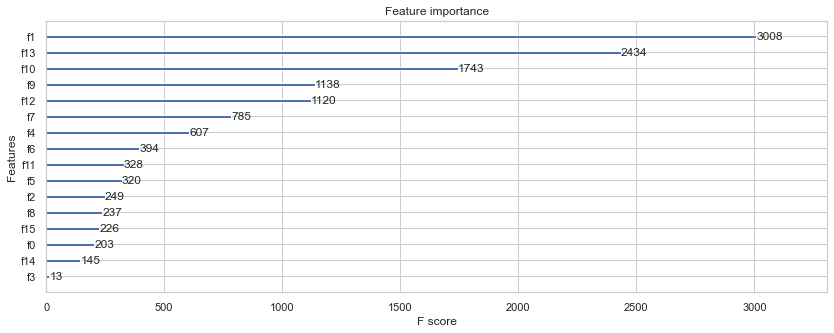

In [46]:
from xgboost import plot_importance
plot_importance(model)

In [48]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour,is_weekend,peak_hr
0,900,288.28,0.0,0.0,40,40,24,5545,2012,10,2,276,40,1,9,5.0,1.0
1,900,289.36,0.0,0.0,75,40,2,4516,2012,10,2,276,40,1,10,5.0,1.0
2,900,289.58,0.0,0.0,90,40,19,4767,2012,10,2,276,40,1,11,5.0,1.0
3,900,290.13,0.0,0.0,90,40,19,5026,2012,10,2,276,40,1,12,5.0,1.0
4,900,291.14,0.0,0.0,75,40,2,4918,2012,10,2,276,40,1,13,5.0,1.0


In [24]:
# xgboost regressor with lasso
time_start = time.perf_counter()
from xgboost import XGBRegressor
#model = XGBRegressor(n_estimators=500, max_depth=8, learning_rate=0.1514, gamma=0.001, reg_lambda=9.08715e-7, alpha=0.921197, tree_method='hist')
# you can define a function for this
c = 42
alpha = (c*x_train.shape[1]/np.sqrt(df.shape[0]))
model = XGBRegressor(n_estimators=500, max_depth=8, learning_rate=0.03, gamma=0.001, reg_lambda=0, alpha=alpha)
model.fit(X_train, Y_train)

XGB_predTrain = model.predict(X_train)
print('training score =',r2_score(Y_train, XGB_predTrain))
XGB_predTest = model.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
#memMb = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
#print('%5.1f secs %5.1f MByte' %(time_elapsed, memMb))
print('R2 =',r2_score(Y_test, XGB_predTest))
print('MAE =',mean_absolute_error(XGB_predTest, Y_test))
print('RMSE =',mean_squared_error(XGB_predTest, Y_test, squared=False))
print('MAPE=',mean_absolute_percentage_error(XGB_predTest, Y_test))

training score = 0.98588664011978
R2 = 0.9778005033982137
MAE = 0.09359397555174606
RMSE = 0.1488393554170353
MAPE= 0.5040434893719375


In [89]:
"""
using Optuna to tune hyperparameters
"""
from sklearn.model_selection import ShuffleSplit
import xgboost as xgb
import optuna


# Split data into training and validation sets
#rs = ShuffleSplit(n_splits=2, test_size=.7, random_state=0)
#train_index, valid_index = next(rs.split(X))
dtrain = xgb.DMatrix(X_train, Y_train)

dvalid = xgb.DMatrix(X_test, Y_test)


# Define hyperparameter search space
base_params = {'verbosity': 0,
              'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'tree_method': 'hist'}  
              # Hyperparameters common to all trials
def objective(trial):
    params = {'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
              'max_depth': trial.suggest_int('max_depth', 3, 8),
              'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
              'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0)}  # Search space
    params.update(base_params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'valid-rmse')
    bst = xgb.train(params, dtrain, num_boost_round=10000,
                    evals=[(dtrain, 'train'), (dvalid, 'valid')], 
                    early_stopping_rounds=50, verbose_eval=False, callbacks=[pruning_callback])
    #if bst.best_iteration >= 25:
    return bst.best_score
   # else:
       # return np.inf  # Reject models with < 25 trees

# Run hyperparameter search
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)
print('Completed hyperparameter tuning with best rmse = {}.'.format(study.best_trial.value))
params = {}
params.update(base_params)
params.update(study.best_trial.params)

# Re-run training with the best hyperparameter combination
print('Re-running the best trial... params = {}'.format(params))
bst = xgb.train(params, dtrain, num_boost_round=10000,
                evals=[(dtrain, 'train'), (dvalid, 'valid')], 
                early_stopping_rounds=50)

# Run prediction on the validation set
df_pred = pd.DataFrame({'Predicted label': bst.predict(dvalid)})
print(df_pred)

# Save trained model
bst.save_model('best_model.json')

[I 2021-03-20 19:19:55,659] A new study created in memory with name: no-name-65616d06-40a5-4447-ba92-ef4694d8a331
[I 2021-03-20 19:19:57,981] Trial 0 finished with value: 0.174868 and parameters: {'learning_rate': 0.03220051024696736, 'max_depth': 5, 'lambda': 0.00014145576280345193, 'alpha': 1.4240040351516428e-06}. Best is trial 0 with value: 0.174868.
[I 2021-03-20 19:20:02,821] Trial 1 finished with value: 0.192881 and parameters: {'learning_rate': 0.01893352512514967, 'max_depth': 3, 'lambda': 1.200548259405202e-06, 'alpha': 6.238428489971563e-07}. Best is trial 0 with value: 0.174868.
[I 2021-03-20 19:20:04,610] Trial 2 finished with value: 0.178186 and parameters: {'learning_rate': 0.049055814844736985, 'max_depth': 4, 'lambda': 0.016812512815568895, 'alpha': 0.002048885702576279}. Best is trial 0 with value: 0.174868.
[I 2021-03-20 19:20:05,429] Trial 3 finished with value: 0.17801 and parameters: {'learning_rate': 0.2494404600991079, 'max_depth': 8, 'lambda': 0.011766547563062

XGBoostError: [19:20:16] C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/predictor/cpu_predictor.cc:267: Check failed: ntree_limit != 0 (0 vs. 0) : 

In [340]:
# dnn
time_start = time.perf_counter()
from sklearn.neural_network import MLPRegressor
DNN_model = MLPRegressor(learning_rate_init=0.0001, hidden_layer_sizes=(100,100,100))
DNN_model.fit(X_train, Y_train)

DNN_predTrain = DNN_model.predict(X_train)
print('training score =',r2_score(Y_train, DNN_predTrain))

DNN_predTest = DNN_model.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
#memMb = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
#print('%5.1f secs %5.1f MByte' %(time_elapsed, memMb))
print('R2 =',r2_score(Y_test, DNN_predTest))
print('MAE =',mean_absolute_error(DNN_predTest , Y_test))
print('RMSE =',mean_squared_error(DNN_predTest , Y_test, squared=False))
print('MAPE=',mean_absolute_percentage_error(DNN_predTest, Y_test))

training score = 0.9594724560139155
R2 = 0.9572851054687515
MAE = 0.15134639413463918
RMSE = 0.20645998264598614
MAPE= 0.5071723318824894


In [18]:
# svm
#time_start = time.perf_counter()
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
regressor.fit(X_train, Y_train)

SVM_train = regressor.predict(X_train)
print('Training score=',r2_score(Y_train, SVM_train))

SVR_pred = regressor.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
#memMb = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
#print('%5.1f secs %5.1f MByte' %(time_elapsed, memMb))
print('R2=',r2_score(Y_test, SVR_pred))
print('MAE=',mean_absolute_error(SVR_pred, Y_test))
print('RMSE=',mean_squared_error(SVR_pred, Y_test, squared=False))
print('MAPE=',mean_absolute_percentage_error(SVR_pred, Y_test))
#print(np.sqrt(mean_squared_error(y_pred, Y_test)))

Training score= 0.9233157091554045
R2= 0.9291345146600799
MAE= 0.18899097812696336
RMSE= 0.2659277139921199
MAPE= 1.0431719445678436


In [328]:
# GBM
from sklearn.ensemble import GradientBoostingRegressor
GBM_model = GradientBoostingRegressor()
GBM_model.fit(X_train, Y_train)

GBM_predTrain = GBM_model.predict(X_train)
print('training score =',r2_score(Y_train, GBM_predTrain))

GBM_pred = GBM_model.predict(X_test)
print('R2 =',r2_score(Y_test, GBM_pred))
print('MAE =',mean_absolute_error(GBM_pred, Y_test))
print('RMSE =',mean_squared_error(GBM_pred, Y_test, squared=False))
print('MAPE=',mean_absolute_percentage_error(GBM_pred, Y_test))

training score = 0.9477017337142606
R2 = 0.9716243393371232
MAE = 0.11772391794558158
RMSE = 0.1682748485105939
MAPE= 0.37924620543967746


In [311]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=10)
regressor.fit(X_train, Y_train)

KNN_pred = regressor.predict(X_test)
print('R2 =',r2_score(Y_test, KNN_pred))
print('MAE =',mean_absolute_error(KNN_pred, Y_test))
print('RMSE =',mean_squared_error(KNN_pred, Y_test, squared=False))
print('MAPE=',mean_absolute_percentage_error(KNN_pred, Y_test))

R2 = 0.8903129329144321
MAE = 0.25193502485882346
RMSE = 0.3308445076757042
MAPE= 0.6470641345655425


In [312]:
# decision tree
#time_start = time.perf_counter()
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, Y_train)

DT_predTrain = DT_model.predict(X_train)
print('training score =',r2_score(Y_train, DT_predTrain))

y_pred2 = DT_model.predict(X_test)
#time_elapsed = (time.perf_counter() - time_start)
#memMb = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
#print('%5.1f secs %5.1f MByte' %(time_elapsed, memMb))
print('R2 =',r2_score(Y_test, y_pred2))
print('MAE =',mean_absolute_error(y_pred2, Y_test))
print('RMSE =',mean_squared_error(y_pred2, Y_test, squared=False))
print('MAPE=',mean_absolute_percentage_error(y_pred2, Y_test))

training score = 1.0
R2 = 0.9392919412128523
MAE = 0.1391438169246226
RMSE = 0.24613274223332324
MAPE= 1.7229787783439834


In [396]:
# LSTM
time_start = time.perf_counter()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# initialize the neural network based on LSTM
modeL = Sequential()
# adding 1st LSTM layer
modeL.add(LSTM(units=100, return_sequences=True, input_shape=(1, X_train.shape[1])))
# adding 2nd LSTM layer
modeL.add(LSTM(units=50, return_sequences=False))
# adding dropout
modeL.add(Dropout(0.25))
# output layer
modeL.add(Dense(units=1, activation='linear'))
# compiling the neural network
modeL.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

# reshape input to be [samples, time steps, features]
Xtrain = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
Xtest = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=20, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss',factor=0.5, patience=20, verbose=1)
#mcp = ModelCheckpoint(filepath='weight.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')

history = modeL.fit(Xtrain, Y_train, shuffle=True, epochs=50, callbacks=[es, rlr, tb], validation_split=0.2, verbose=1, batch_size=500)

# LSTM prediction
LSTM_predTrain = modeL.predict(Xtrain)
print('training score =',r2_score(Y_train, LSTM_predTrain))
LSTM_predTest = modeL.predict(Xtest)
time_elapsed = (time.perf_counter() - time_start)
#memMb = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
#print('%5.1f secs %5.1f MByte' %(time_elapsed, memMb))
print('R2 =',r2_score(LSTM_predTest , Y_test))
print('MAE =',mean_absolute_error(LSTM_predTest , Y_test))
print('RMSE =',mean_squared_error(LSTM_predTest , Y_test, squared=False))
print('MAPE=',mean_absolute_percentage_error(LSTM_predTest, Y_test))

Epoch 1/50
43/43 [==============================] - 12s 150ms/step - loss: 0.4824 - val_loss: 0.0902
Epoch 2/50
43/43 [==============================] - 1s 16ms/step - loss: 0.1307 - val_loss: 0.0853
Epoch 3/50
43/43 [==============================] - 1s 15ms/step - loss: 0.1085 - val_loss: 0.0911
Epoch 4/50
43/43 [==============================] - 1s 15ms/step - loss: 0.1022 - val_loss: 0.0877
Epoch 5/50
43/43 [==============================] - 1s 15ms/step - loss: 0.0974 - val_loss: 0.0646
Epoch 6/50
43/43 [==============================] - 1s 14ms/step - loss: 0.0896 - val_loss: 0.0615
Epoch 7/50
43/43 [==============================] - 1s 14ms/step - loss: 0.0833 - val_loss: 0.0678
Epoch 8/50
43/43 [==============================] - 1s 15ms/step - loss: 0.0860 - val_loss: 0.0733
Epoch 9/50
43/43 [==============================] - 1s 14ms/step - loss: 0.0791 - val_loss: 0.0691
Epoch 10/50
43/43 [==============================] - 1s 14ms/step - loss: 0.0750 - val_loss: 0.0807
Epoch 1

In [103]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [17]:
# spot checking algorithms 1 (r2_score)
models = []
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('HGB', HistGradientBoostingRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('CatBoost', CatBoostRegressor(verbose=0, n_estimators=100)))

#evaluate each model in turn
results = []
names = []
scoring = 'r2'
for name, model in models:
    cv = KFold(n_splits = 10, random_state = 1)
    cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

RF: 0.968625
GB: 0.932252
HGB: 0.973797
XGB: 0.977688
LGBM: 0.974292
CatBoost: 0.973504


In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [31]:
# spot checking algorithms 2 (mean absolute error)
models = []
#models.append(('RF', RandomForestRegressor()))
#models.append(('XGB', XGBRegressor(n_estimators=250, max_depth=7, learning_rate=0.2, gamma=0.001)))
models.append(('SVM', SVR(kernel= 'rbf')))
#models.append(('KNN', KNeighborsRegressor()))
#models.append(('DNN', MLPRegressor(hidden_layer_sizes=(100,100,100))))

#evaluate each model in turn
results = []
names = []
scoring = 'r2'
for name, model in models:
    cv = KFold(n_splits = 10, shuffle=True)
    cv_results = cross_val_score(model, x_val, y_val, cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

SVM: 0.795083


In [ ]:
# Hyperparameter optimization

regressor = XGBRegressor()

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
min_child_weight = [1, 2, 3, 4]
learning_rate = [0.05, 0.10, 0.15, 0.20]
base_score = [0.25, 0.50, 0.75, 1]
gamma = [0.5, 1, 1.5, 2, 2.5]

# define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate, 'min_child_weight': min_child_weight, 'booster': booster, 'base_score': base_score, 'gamma': gamma}

In [ ]:
# set up the random search with k-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor, param_distributions=hyperparameter_grid,cv=10, n_iter=50, scoring='r2', n_jobs = 4, verbose=5, return_train_score=True, random_state=1)

In [ ]:
random_cv.fit(X_train, Y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
regressor1 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,importance_type='gain', interaction_constraints='',learning_rate=0.300000012, max_delta_step=0, max_depth=6,min_child_weight=1, missing=None, monotone_constraints='()',
n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
regressor1.fit(X_train, Y_train)

train_pred = regressor1.predict(X_train)
print(r2_score(Y_train, train_pred))
y_pred = regressor1.predict(X_test)

print(r2_score(Y_test, y_pred))
print(mean_absolute_error(y_pred, Y_test))
print(mean_squared_error(y_pred, Y_test, squared=False))

In [ ]:
train_size = int(len(data) * 0.7)

In [25]:
# invert scaled values
#RF_predTest_inv = scaler.inverse_transform(RF_predTest)
XGB_predTest_inv = scaler.inverse_transform(XGB_predTest)
SVR_predTest_inv = scaler.inverse_transform(SVR_pred)
#DNN_predTest_inv = scaler.inverse_transform(DNN_predTest)
#LSTM_predTest_inv = scaler.inverse_transform(LSTM_predTest)

In [211]:
y_test_frac = int(len(y_test)*0.05)

Text(0, 0.5, 'Traffic volume')

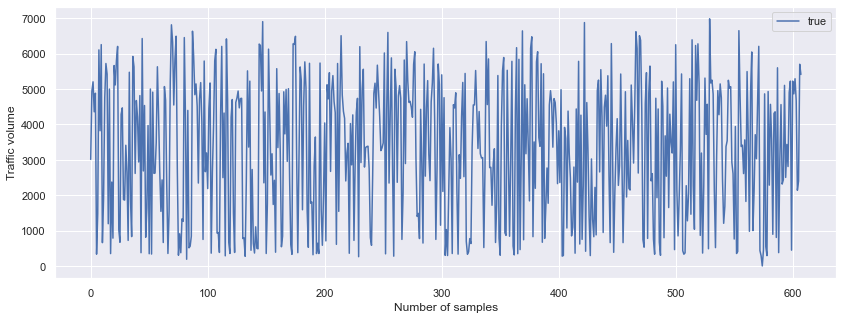

In [24]:
# visualization of actual values
# set plot size
from pylab import rcParams
rcParams ['figure.figsize'] = 14, 5
plt.plot(y_test[0:y_test_frac].values.flatten(), label = 'true')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Traffic volume')

In [ ]:
y_test.shape

Text(0, 0.5, 'Traffic volume')

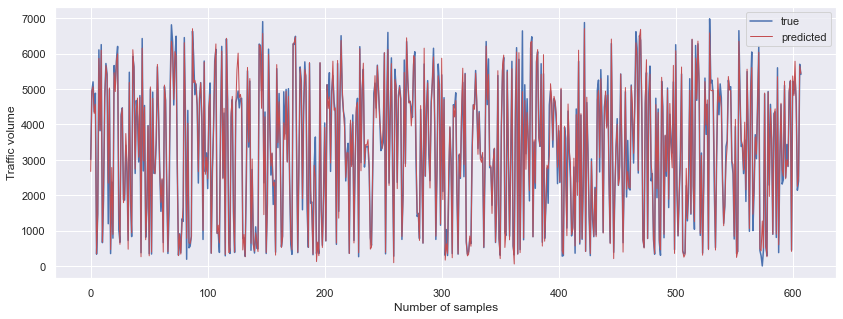

In [26]:
# visualize prediction of XGBOOST
# set plot size
from pylab import rcParams
rcParams ['figure.figsize'] = 14, 5
plt.plot(y_test[0:y_test_frac].values.flatten(), label = 'true')
plt.plot(XGB_predTest_inv[0:y_test_frac].flatten(),'r', label='predicted', linewidth=1)
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Traffic volume')

In [35]:
# wilcoxon test
from scipy.stats import wilcoxon

y = [98.04, 98.05, 98.081, 98.075, 97.992, 98.055, 98.066, 98.052, 98.064, 98.062, 98.032, 98.039]
# dnn
x1 = [96.495, 96.539, 96.036, 96.41, 96.449, 96.451, 96.496, 96.456, 96.457, 96.529, 96.514, 96.508]
# RF
x2 = [96.99, 97.03, 96.992, 96.914, 96.950, 96.951, 96.923, 96.91, 96.927, 96.902, 96.923, 96.956]
# knn
x3 = [72.160, 71.960, 71.929, 71.307, 71.4, 71.212, 71.259, 71.478, 71.291, 71.042, 71.351, 71.356]
#svm
x4 = [79.48, 79.52, 79.508, 79.559, 79.559, 79.557, 79.515, 79.574, 79.557, 79.528, 79.492, 79.557]

stat, p = wilcoxon(x4, y)
print('Statistics = %.3f, p = %.3f'% (stat, p))

# interpret
alpha = 0.05
if p < alpha:
    print('statistical difference')
else:
    print('no statistical difference')

Statistics = 0.000, p = 0.000
statistical difference


In [39]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour,is_weekend,peak_hr
0,900,288.28,0.0,0.0,40,40,24,5545,2012,10,2,276,40,1,9,5.0,1.0
1,900,289.36,0.0,0.0,75,40,2,4516,2012,10,2,276,40,1,10,5.0,1.0
2,900,289.58,0.0,0.0,90,40,19,4767,2012,10,2,276,40,1,11,5.0,1.0
3,900,290.13,0.0,0.0,90,40,19,5026,2012,10,2,276,40,1,12,5.0,1.0
4,900,291.14,0.0,0.0,75,40,2,4918,2012,10,2,276,40,1,13,5.0,1.0


In [174]:
df_date['date_time'] = pd.to_datetime(df_date['date_time'], format='%b %d, %Y')

KeyError: 'date_time'

In [20]:
df_date.set_index('date_time', inplace=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)
#df.set_index('date_time', inplace=True)
y_test = y_test.values

In [137]:
y_test.shape

(12167,)

In [363]:
df1=df['2018-01-01':'2018-01-20']['traffic_volume']

In [26]:
#RF_pred = pd.DataFrame(RF_predTest_inv, index=df_copy[n_train_hours:].index.values, columns=['RF_pred'])
#joined_df = df_copy.join(RF_pred, how = 'inner')

XGB_pred = pd.DataFrame(XGB_predTest_inv, index=df_date[n_train_hours+1:].index.values, columns=['XGB_pred'])
joined_df = df_date.join(XGB_pred, how = 'inner')

SVM_pred = pd.DataFrame(SVR_predTest_inv, index=df_date[n_train_hours+1:].index.values, columns=['SVM_pred'])
joined_df = joined_df.join(SVM_pred, how = 'inner')

#DNN_pred = pd.DataFrame(DNN_predTest_inv, index=df_copy[n_train_hours:].index.values, columns=['DNN_pred'])
#joined_df = joined_df.join(DNN_pred, how = 'inner')

#LSTM_pred = pd.DataFrame(LSTM_predTest_inv, index=df_copy[n_train_hours:].index.values, columns=['LSTM_pred'])
#joined_df = joined_df.join(LSTM_pred, how = 'inner')

#y_test.set_index('LSTM_pred', inplace=True)

y_test_df = pd.DataFrame(y_test, index=df_date[n_train_hours+1:].index.values, columns=['y_test_df'])
joined_df = joined_df.join(y_test_df, how = 'inner')


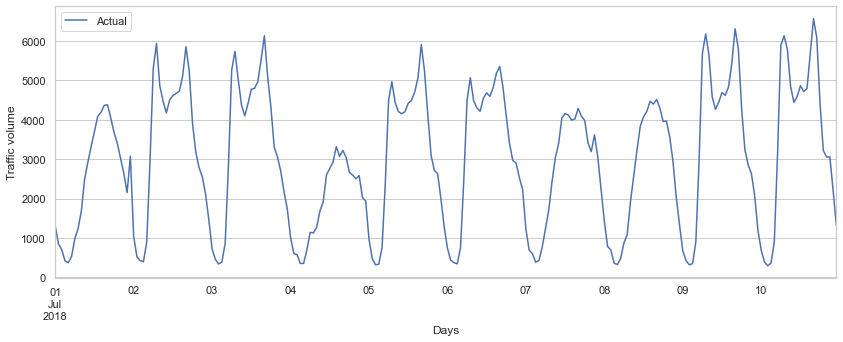

In [22]:
# visualizing actual y values
import seaborn as sns
sns.set_style('whitegrid')

from pylab import rcParams
rcParams ['figure.figsize'] = 14, 5

df1=joined_df['2018-07-01':'2018-07-10']['y_test_df']
df1.plot(label='Actual')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Traffic volume')
plt.show()

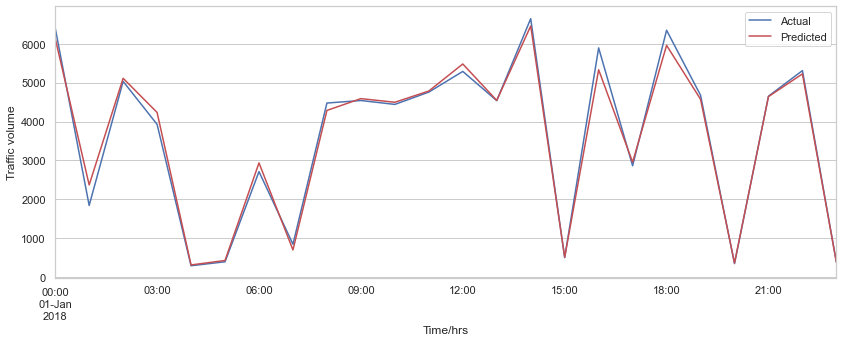

In [141]:
df2=joined_df['2018-01-01']['RF_pred']

df1.plot(label='Actual')
df2.plot(color='r', label='Predicted')
plt.legend()
plt.xlabel('Time/hrs')
plt.ylabel('Traffic volume')
plt.show()

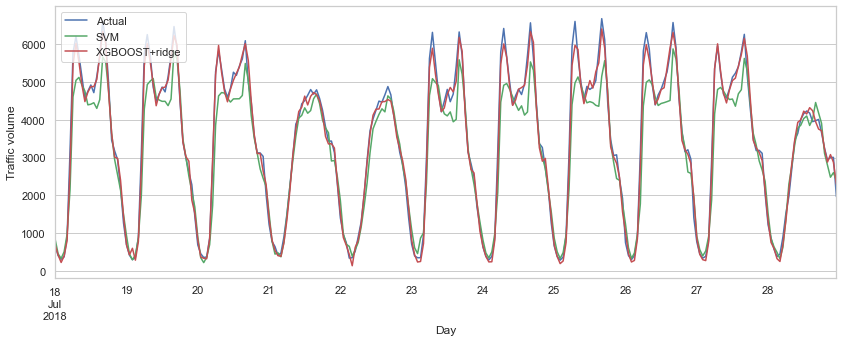

In [27]:
# visualize xgboost prediction
df1=joined_df['2018-07-18':'2018-07-28']['y_test_df']

df3=joined_df['2018-07-18':'2018-07-28']['XGB_pred']
df4=joined_df['2018-07-18':'2018-07-28']['SVM_pred']
#df3=joined_df['2018-08-25']['XGB_pred']
#df4=joined_df['2018-08-25']['SVM_pred']

f = plt.figure()
df1.plot(label='Actual')
df4.plot(color='g',label='SVM')
df3.plot(color='r',label='XGBOOST+ridge')
plt.legend(loc='upper left')
plt.xlabel('Day')
plt.ylabel('Traffic volume')
plt.show()

f.savefig('ridge_normal_day_svm_xgb_v5.pdf', bbox_inches='tight')